# BLG-307 Yapay Zeka Sistemleri
## Proje Ödevi – Genetik Algoritma ile Optimizasyon

**Ad Soyad:** Reyyan Çeliköz

**Okul No:** 2312721024

**Senaryo:**  Senaryo 4 – Tarım Arazisinde Gübre ve Sulama Ayarıu 

**Amaç:**  Tarım arazisinde kullanılan gübre (x1) ve sulama (x2) miktarlarını,  
verilen kısıtlar altında bitki verimini maksimize edecek şekilde belirlemek.

**Yöntem:**  Genetik Algoritma


## Genetik Algoritma Nedir?

Genetik algoritma, doğadaki evrim sürecinden esinlenen bir optimizasyon yöntemidir.
Amaç, rastgele çözümlerle başlayıp, her nesilde daha iyi çözümler elde etmektir.

Bu süreçte:
- İyi çözümler seçilir
- Birbirleriyle çaprazlanır
- Küçük rastgele değişiklikler (mutasyon) yapılır
- Zamanla en iyi çözüme yaklaşılır


In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

random.seed(0)
np.random.seed(0)

## Amaç Fonksiyonu

Amaç fonksiyonu, elde edilmek istenen verimi temsil eder.
Genetik algoritma bu fonksiyonu maksimize etmeye çalışır.


In [2]:
def fitness(x1, x2):
    return 10 * x1 + 6 * x2 - 0.5 * (x1 ** 2) - 0.2 * (x2 ** 2)


## Kısıtlar

Gerçek hayata uygun olması için çözüm uzayı bazı kısıtlarla sınırlandırılmıştır.


In [3]:
def is_valid(x1, x2):
    return (
        0 <= x1 <= 50 and
        20 <= x2 <= 100 and
        x1 + 0.1 * x2 <= 60
    )


In [4]:
def create_population(size):
    population = []
    while len(population) < size:
        x1 = random.uniform(0, 50)
        x2 = random.uniform(20, 100)
        if is_valid(x1, x2):
            population.append([x1, x2])
    return np.array(population)


In [5]:
def selection(population, k=3):
    selected = random.sample(list(population), k)
    selected.sort(key=lambda ind: fitness(ind[0], ind[1]), reverse=True)
    return selected[0]


In [6]:
def crossover(parent1, parent2):
    alpha = random.random()
    x1 = alpha * parent1[0] + (1 - alpha) * parent2[0]
    x2 = alpha * parent1[1] + (1 - alpha) * parent2[1]
    return [x1, x2]


In [7]:
def mutation(individual, rate=0.1):
    if random.random() < rate:
        individual[0] += random.uniform(-2, 2)
        individual[1] += random.uniform(-5, 5)
        individual[0] = min(max(individual[0], 0), 50)
        individual[1] = min(max(individual[1], 20), 100)
    return individual


In [8]:
population_size = 30
generations = 100
mutation_rate = 0.1

population = create_population(population_size)


In [11]:
best_solution = None
best_fitness = -np.inf
best_fitness_per_generation = []

for gen in range(generations):
    new_population = []

    elite = selection(population)
    new_population.append(elite)

    while len(new_population) < population_size:
        parent1 = selection(population)
        parent2 = selection(population)
        child = crossover(parent1, parent2)
        child = mutation(child, mutation_rate)
        if is_valid(child[0], child[1]):
            new_population.append(child)

    population = np.array(new_population)

    for ind in population:
        fit = fitness(ind[0], ind[1])
        if fit > best_fitness:
            best_fitness = fit
            best_solution = ind

    best_fitness_per_generation.append(best_fitness)


## Sonuçlar ve Grafik

Aşağıdaki grafikte, genetik algoritmanın nesiller boyunca
en iyi çözümü nasıl iyileştirdiği görülmektedir.


En iyi çözüm:
Gübre miktarı (x1): 10.0
Sulama miktarı (x2): 20.0
Maksimum verim: 90.0


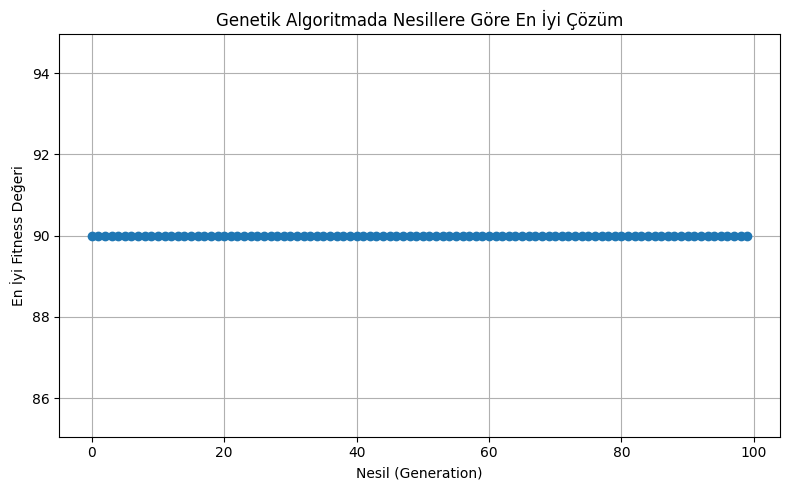

In [12]:
print("En iyi çözüm:")
print("Gübre miktarı (x1):", round(best_solution[0], 2))
print("Sulama miktarı (x2):", round(best_solution[1], 2))
print("Maksimum verim:", round(best_fitness, 2))

# Grafik
plt.figure(figsize=(8, 5))
plt.plot(best_fitness_per_generation, marker='o')
plt.xlabel("Nesil (Generation)")
plt.ylabel("En İyi Fitness Değeri")
plt.title("Genetik Algoritmada Nesillere Göre En İyi Çözüm")
plt.grid(True)
plt.tight_layout()
plt.show()
